<a href="https://colab.research.google.com/github/duybluemind1988/project_py/blob/main/Churn/Churn_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get data

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Data analysis

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
print(X_train.shape)
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_train = X_train.dropna()
print(X_train.shape) # remove 7 values

(4507, 20)
(4500, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(X_test.shape)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
X_test = X_test.dropna()
print(X_test.shape) # remove 7 values

(1409, 20)
(1407, 20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Sweetvis

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv

my_report = sv.analyze(X_train)
my_report.show_html("analyze.html",open_browser=False) # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.


In [ ]:
import IPython
IPython.display.HTML("analyze.html")

In [ ]:
compare_report = sv.compare([X_train,"train"],[X_test,"test"])
compare_report.show_html("compare.html",open_browser=False) 

In [ ]:
IPython.display.HTML("compare.html")

## Autovis

In [ ]:
!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

#EDA using Autoviz
autoviz = AutoViz_Class().AutoViz(path)

## Dtale

In [ ]:
#!pip install dtale

In [ ]:
import dtale
import dtale.app as dtale_app
dtale_app.USE_COLAB = True
dtale.show(X_train)

https://ddzhzwx83oe-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/7

In [ ]:
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Try Worflow (fail)

In [ ]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
X_train.dtypes
X_train.isnull().sum()

In [ ]:
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))

No     3311
Yes    1196
Name: Churn, dtype: int64
No     0.734635
Yes    0.265365
Name: Churn, dtype: float64


In [ ]:
X_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
731,6621-YOBKI,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.35,92.75
5546,7880-XSOJX,Male,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check,42.40,146.4
3023,0238-WHBIQ,Male,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),89.70,6339.3
3914,1755-FZQEC,Male,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.90,791.15
4787,5542-DHSXL,Female,0,Yes,No,4,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,54.70,235.05


- Replace '' in Total charges column
- Convert to category or ordinal encoder or one hot encoder
- No need to remove NA value for tree method


In [ ]:
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [ ]:
def to_category(x):
  return x.astype("category")

to_category_transform = preprocessing.FunctionTransformer(to_category)

In [ ]:
X_train_a = to_category_transform.fit_transform(X_train)
X_train_a["gender"]

731       Male
5546      Male
3023      Male
3914      Male
4787    Female
         ...  
913       Male
3170      Male
1222      Male
5109      Male
6524      Male
Name: gender, Length: 4507, dtype: category
Categories (2, object): ['Female', 'Male']

In [ ]:
#Standard scaler all numeric value
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = pipeline.Pipeline(steps=[('scaler', preprocessing.StandardScaler())])

#Convert to category all category value
categorical_features = X_train.select_dtypes(include=['object']).columns
categorical_transformer = pipeline.Pipeline(steps=[("astype_category",to_category_transform)])


transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categoric', categorical_transformer, categorical_features),
]
preprocessor = compose.ColumnTransformer(transformers)

In [ ]:
# Create transform X value
X_train_tran = preprocessor.fit_transform(X_train)
X_test_tran=preprocessor.transform(X_test)

In [ ]:
pd.DataFrame(X_train_tran)

In [ ]:
pd.DataFrame(X_test_tran)[5]

0       Female
1       Female
2         Male
3       Female
4         Male
         ...  
1404      Male
1405      Male
1406      Male
1407      Male
1408    Female
Name: 5, Length: 1409, dtype: object

In [ ]:
# Keep track transformer colum names:
def get_transformer_feature_names(columnTransformer): #mean: preprocessor 

    output_features = []

    for name, pipe, features in columnTransformer.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)

    return output_features
print(len(get_transformer_feature_names(preprocessor)))
get_transformer_feature_names(preprocessor)

20


['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
#Apply name to X_train and X_test after transformer
X_train_tran_df=pd.DataFrame(X_train_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_test_tran_df=pd.DataFrame(X_test_tran, 
             columns=get_transformer_feature_names(preprocessor))
X_train_tran_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,-0.42989,-1.12507,-1.48178,-0.972213,6621-YOBKI,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
1,-0.42989,-1.1657,-0.742942,-0.948456,7880-XSOJX,Male,No,No,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Mailed check
2,-0.42989,1.59694,0.841966,1.7939,0238-WHBIQ,Male,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
3,-0.42989,0.256246,-1.49686,-0.662946,1755-FZQEC,Male,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
4,-0.42989,-1.1657,-0.330799,-0.9092,5542-DHSXL,Female,Yes,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check


# Try normal

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,cross_validate
#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import recall_score,precision_score,roc_curve,auc,precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score,average_precision_score
from sklearn.metrics import make_scorer

In [25]:
path='https://raw.githubusercontent.com/rstudio/keras-customer-churn/master/data/WA_Fn-UseC_-Telco-Customer-Churn.csv'
df=pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## No convert

In [ ]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [ ]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)

In [ ]:
# evaluate the model
model = LGBMClassifier()
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in fields gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, TotalCharges

## Convert to category (factor) only

In [29]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [30]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=X_train.astype("category")
X_test=X_test.astype("category")

In [34]:
# evaluate the model
#model = LGBMClassifier()
#cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
#n_scores = model_selection.cross_val_score(model, X_train, y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
#print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
#from matplotlib import pyplot
# plot model performance for comparison
#pyplot.boxplot(n_scores, showmeans=True)
#pyplot.show()

Accuracy: 0.689 (0.021)


In [35]:
#Lgbm dung duoc neu convert object to category, khong can phai remove NaN value
model=LGBMClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[902 133]
 [166 208]]
Balanced Accuracy score: 0.7138236585806919
macro f1 score: 0.7198201703194571
              precision    recall  f1-score   support

          No       0.84      0.87      0.86      1035
         Yes       0.61      0.56      0.58       374

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



In [36]:
imp_vals= model.feature_importances_
varimp_grid_df=pd.DataFrame({'feature': X_train.columns, 'importance': imp_vals})
varimp_grid_df=varimp_grid_df.sort_values(by='importance',ascending=False)
varimp_grid_df.head(10)

,feature,importance
16,PaymentMethod,447
4,tenure,374
7,InternetService,211
14,Contract,204
6,MultipleLines,186
0,gender,169
9,OnlineBackup,159
8,OnlineSecurity,140
10,DeviceProtection,135
11,TechSupport,134


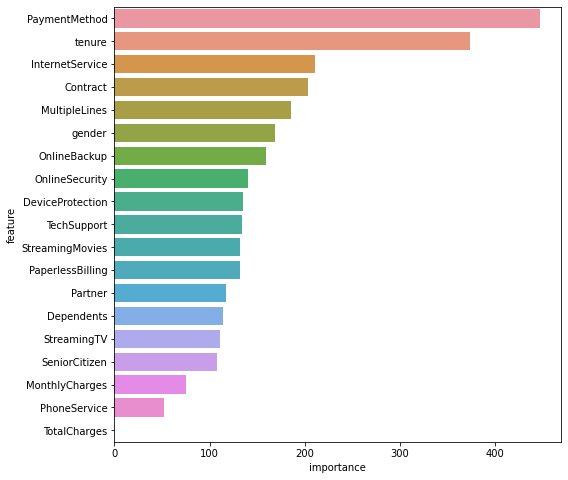

In [37]:
fig,ax=plt.subplots(figsize=(8,8))
sns.barplot(x='importance',y='feature',data=varimp_grid_df,ax=ax)
plt.show()

In [ ]:
!pip install shap
import shap

In [49]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


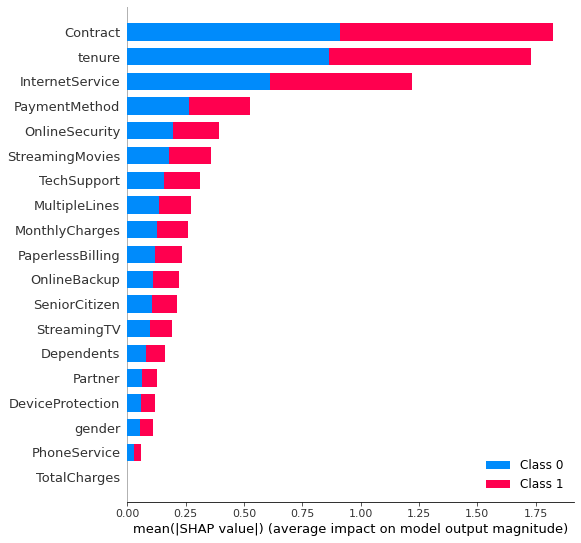

In [50]:
shap.summary_plot(shap_values, X_train)

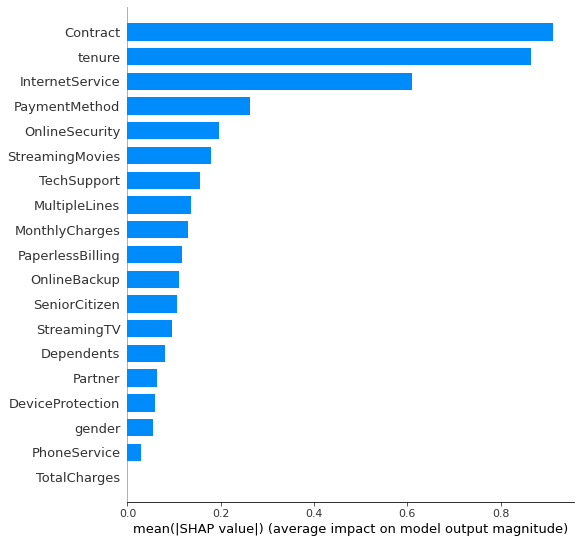

In [58]:
shap.summary_plot(shap_values[1], X_train, plot_type="bar")

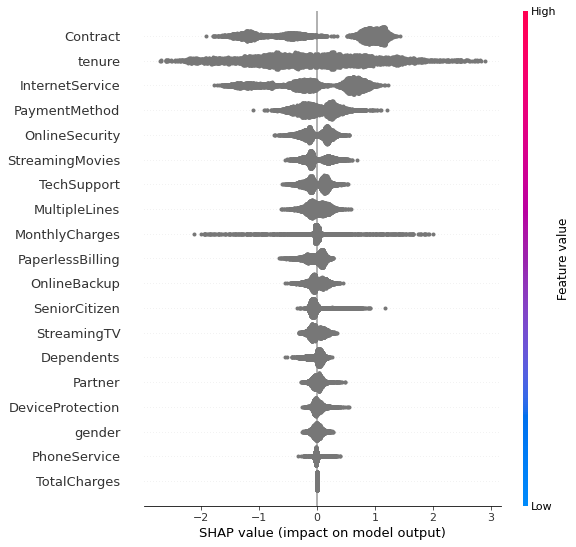

In [56]:
shap.summary_plot(shap_values[1], X_train)

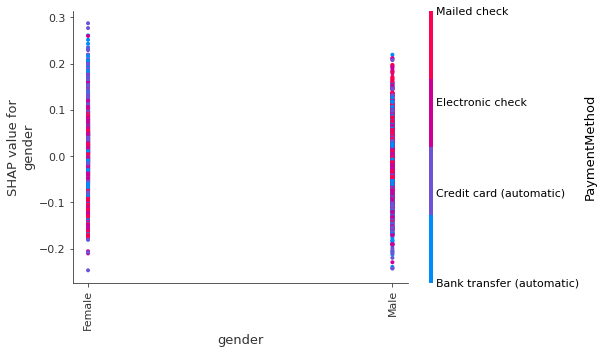

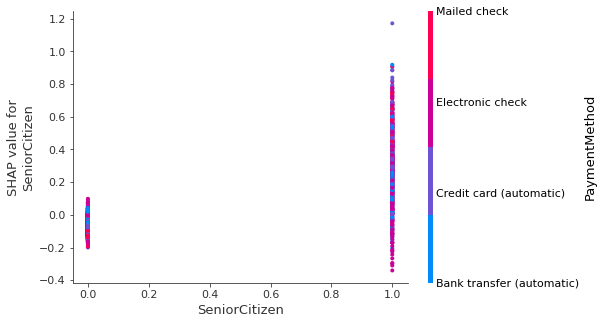

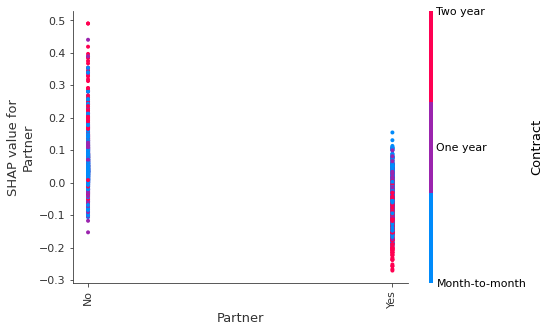

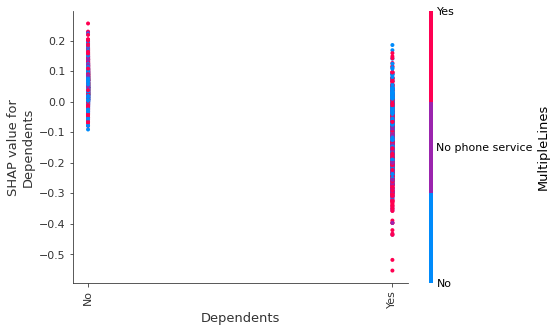

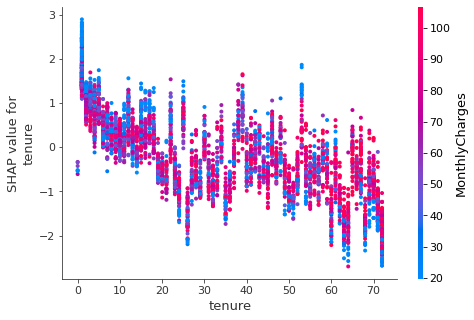

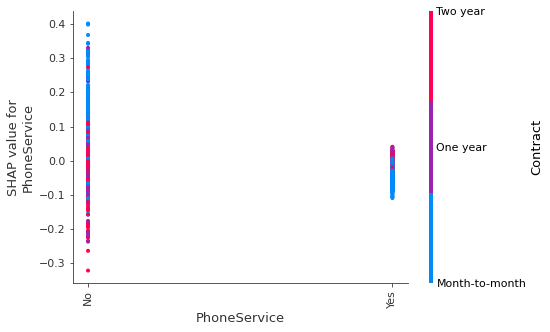

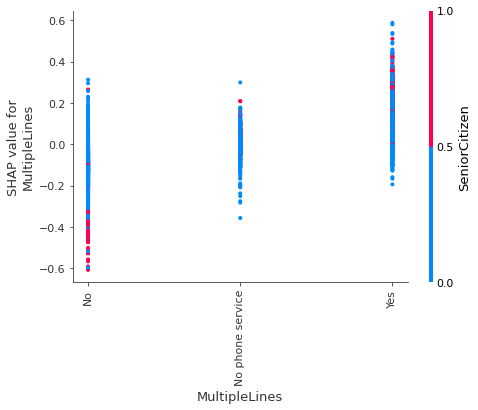

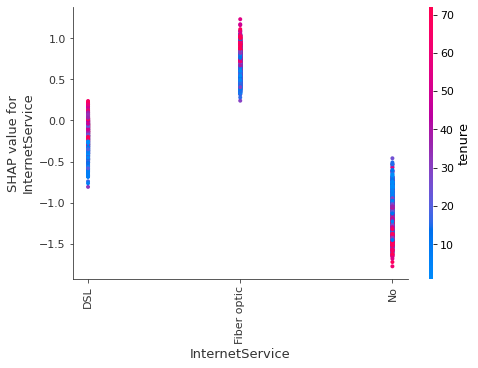

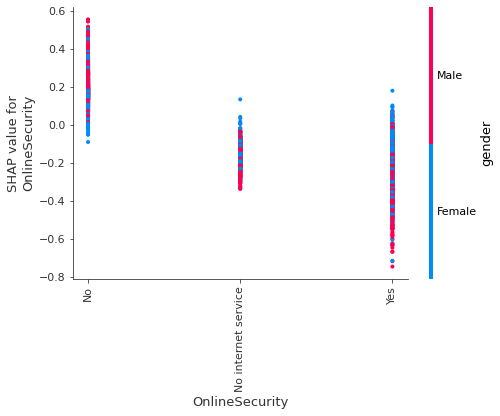

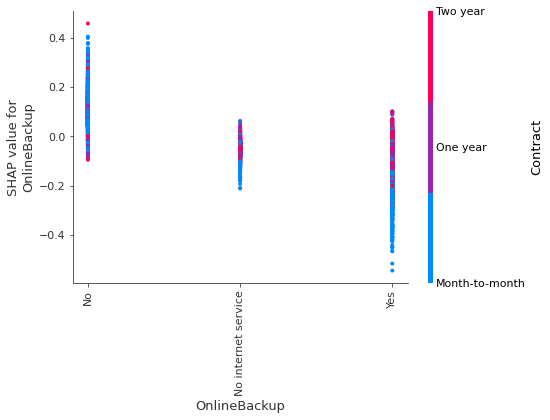

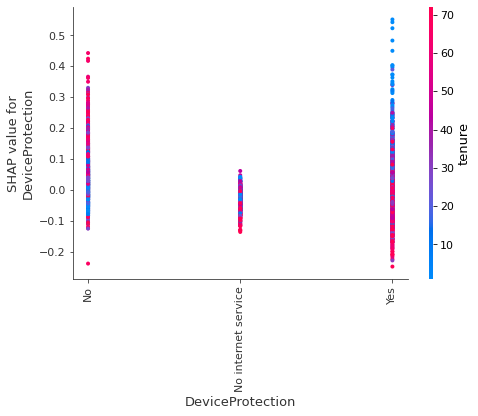

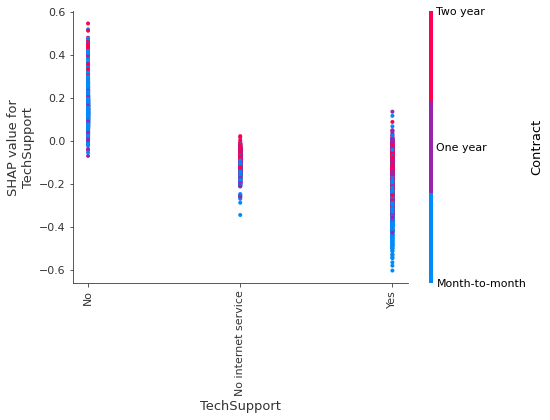

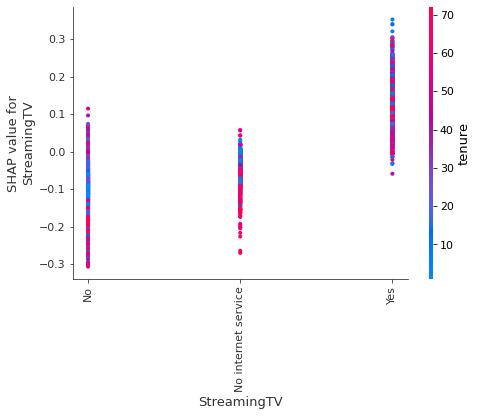

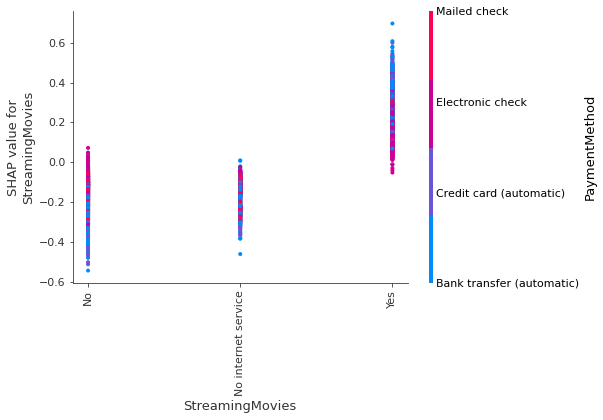

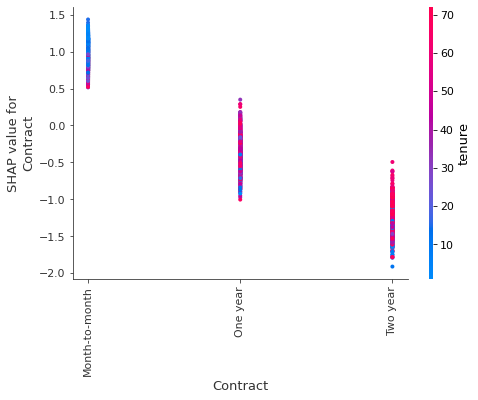

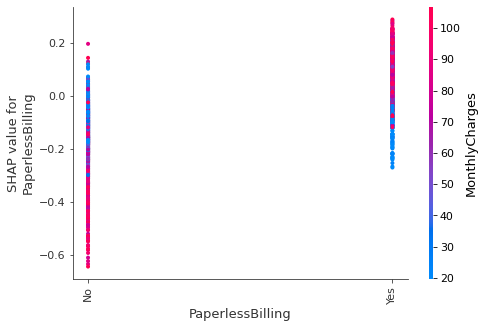

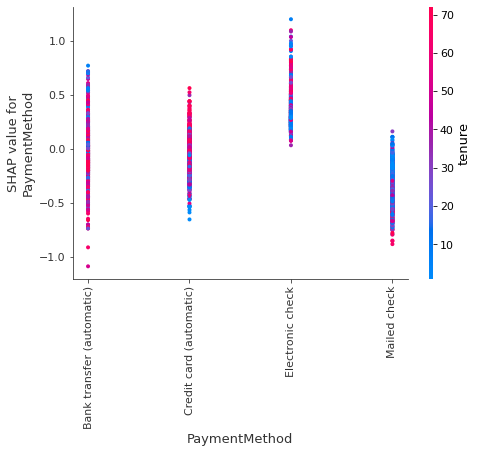

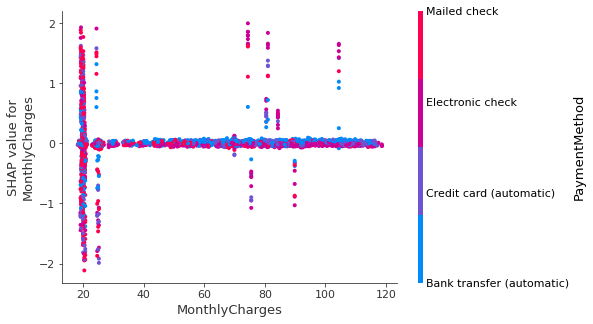

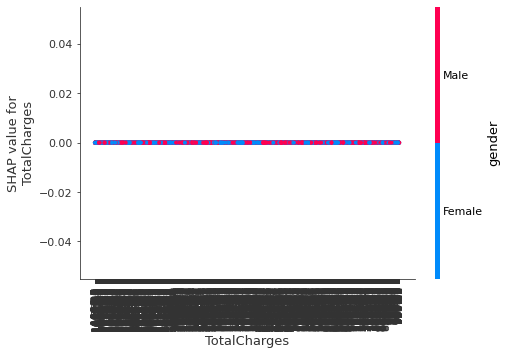

In [59]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values[1], X_train, display_features=X_train)

In [46]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_test.iloc[0,:])

In [47]:
# print the JS visualization code to the notebook
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:100,:], X_test.iloc[:100,:])

Other light gbm

In [61]:
import lightgbm as lgb

In [96]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_val=X_val.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert to category (factor)
X_train=X_train.astype("category")
X_val=X_val.astype("category")
X_test=X_test.astype("category")
# label encoder y train, y test
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)
# Model
d_train = lgb.Dataset(X_train, label=y_train)
d_val = lgb.Dataset(X_val, label=y_val)
params = {
    "max_bin": 512,
    "learning_rate": 0.05,
    "boosting_type": "gbdt",
    "objective": "binary",
    "metric": "binary_logloss",
    "num_leaves": 10,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
model_2 = lgb.train(params, d_train, 10000, valid_sets=[d_val], 
                    early_stopping_rounds=50, verbose_eval=1000)
predictions=(model_2.predict(X_test)>=0.5).astype(int) # convert propability to True/False and 1/0

print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

(7043, 20)
(7043,)
Training until validation scores don't improve for 50 rounds.


categorical_feature in param dict is overridden.


Early stopping, best iteration is:
[63]	valid_0's binary_logloss: 0.416647
[[929 106]
 [187 187]]
Balanced Accuracy score: 0.6987922705314009
macro f1 score: 0.7122519632791693
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



Prediction bằng binary_logloss: array([0.21159053, 0.04097542, 0.07211375, ..., 0.23537171, 0.22034149,
       0.46425456])
  

In [ ]:
# Xgboost bat buoc phai dung onehot encoder or label / ordinal encoder, khong dung duoc cho category
model=XGBClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges

## Convert to ordinal encoder or one hot encoder

In [97]:
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7043, 20)
(7043,)


In [98]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert total charge object to numeric
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [99]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
731,0,5,20.35,92.75,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1
5546,0,4,42.40,146.40,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3023,0,72,89.70,6339.30,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
3914,0,39,19.90,791.15,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
4787,0,4,54.70,235.05,1,0,0,1,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,12,20.05,267.00,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0
3170,0,28,100.20,2688.45,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0
1222,0,64,69.25,4447.75,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1
5109,0,66,65.85,4097.05,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [100]:
# Xgboost bat buoc phai dung onehot encoder or label / ordinal encoder, khong dung duoc cho category
model=XGBClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[923 112]
 [171 203]]
Balanced Accuracy score: 0.7172840941383141
macro f1 score: 0.7281667701742676
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1035
         Yes       0.64      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [103]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

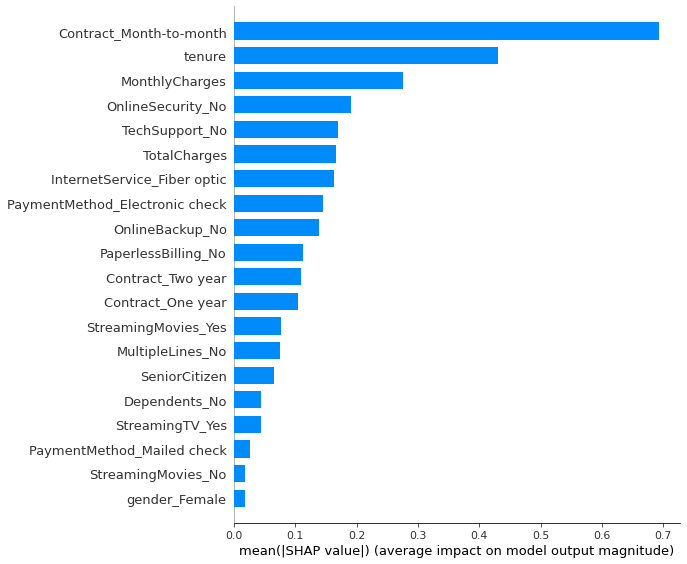

In [104]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

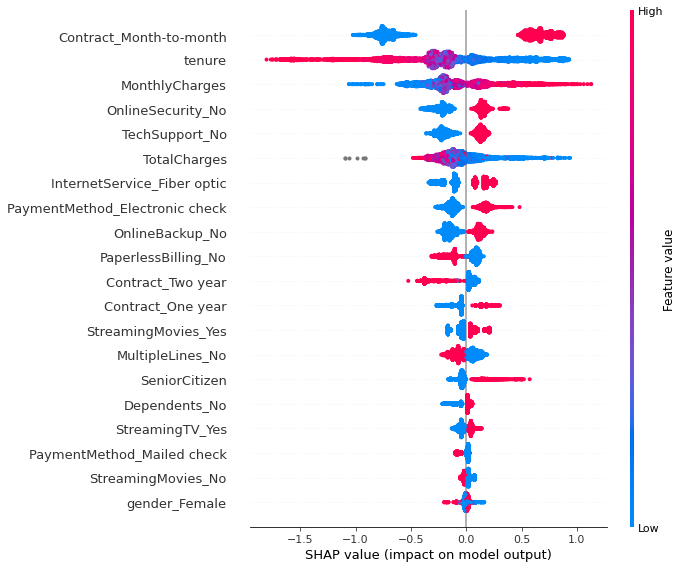

In [105]:
shap.summary_plot(shap_values, X_train)

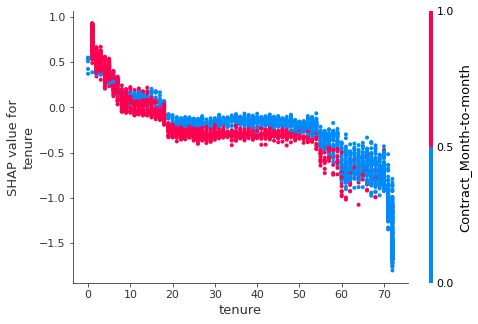

In [111]:
shap.dependence_plot(1, shap_values, X_train)

SeniorCitizen


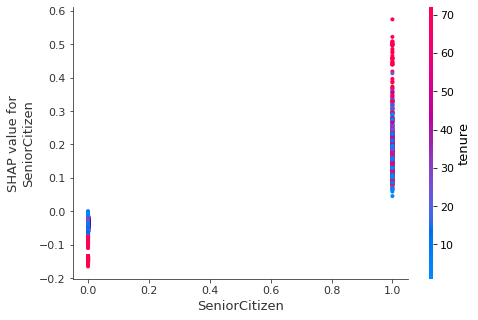

tenure


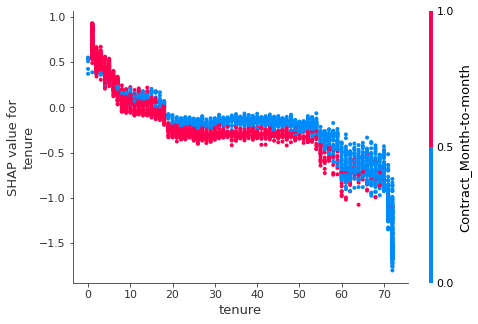

MonthlyCharges


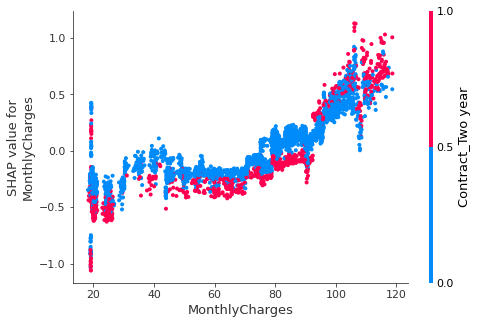

TotalCharges


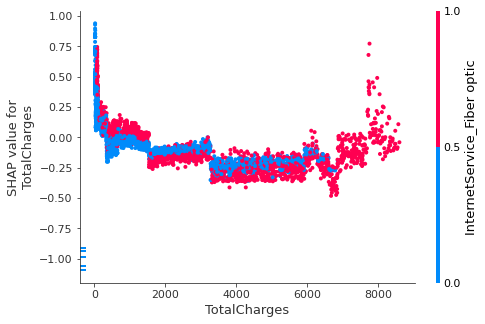

gender_Female


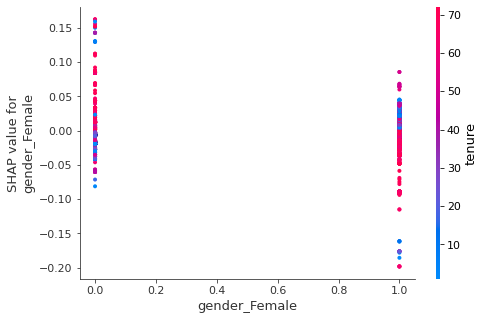

gender_Male


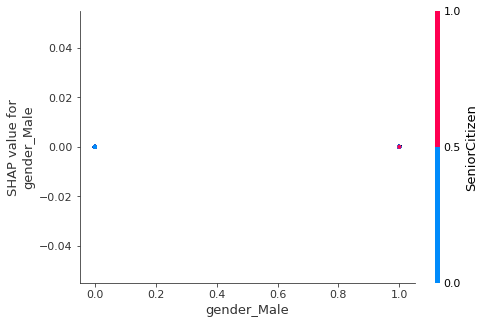

Partner_No


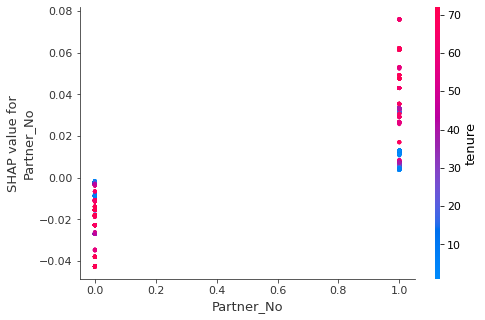

Partner_Yes


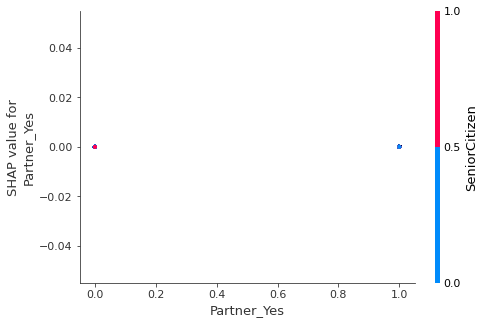

Dependents_No


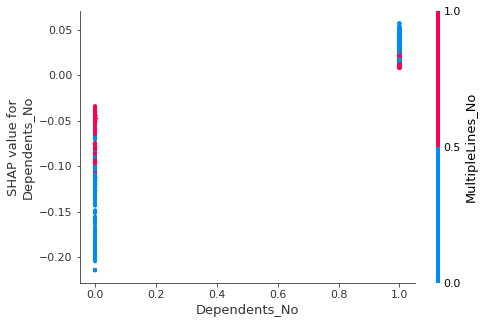

Dependents_Yes


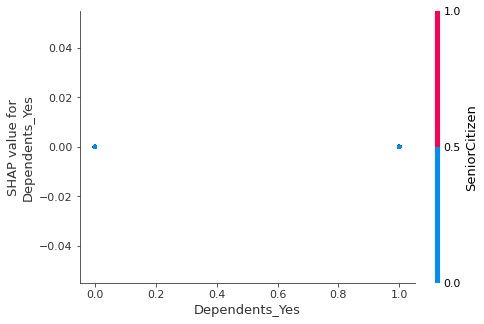

PhoneService_No


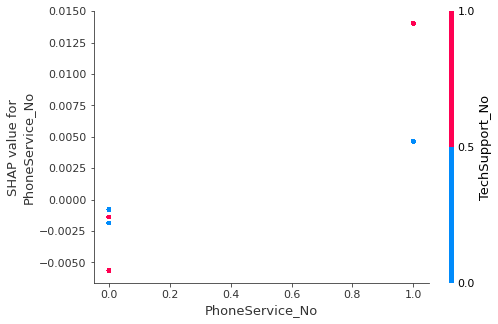

PhoneService_Yes


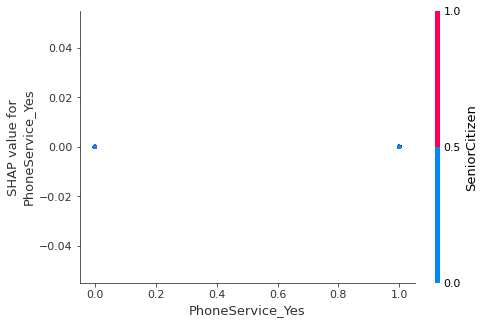

MultipleLines_No


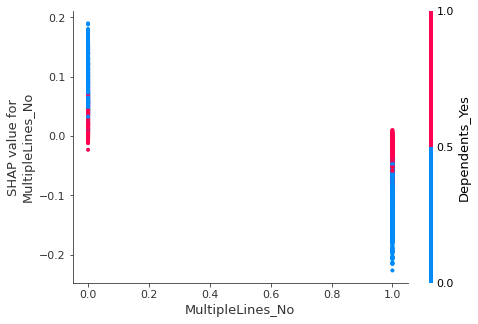

MultipleLines_No phone service


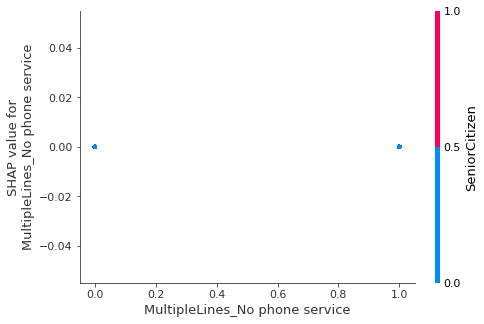

MultipleLines_Yes


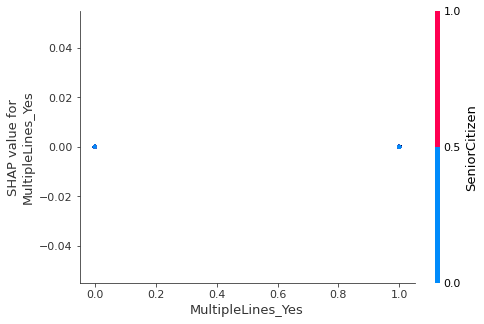

InternetService_DSL


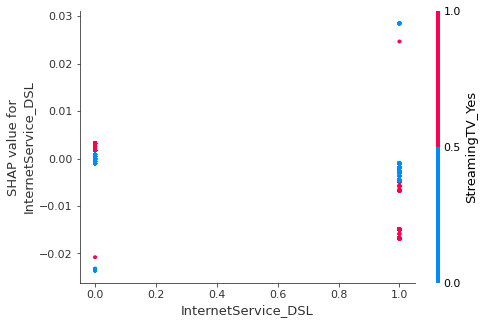

InternetService_Fiber optic


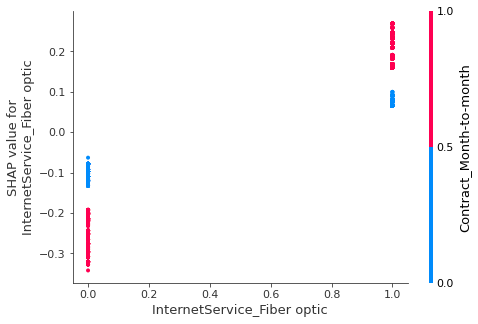

InternetService_No


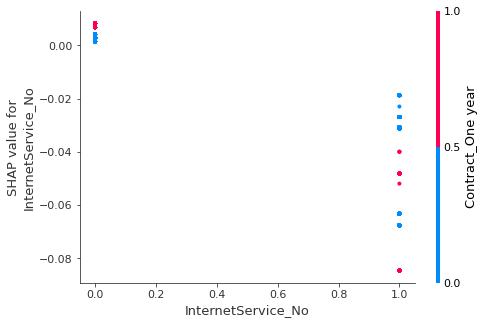

OnlineSecurity_No


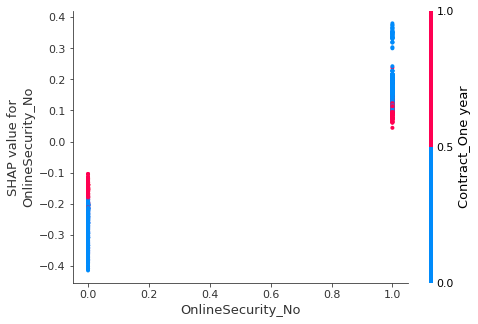

OnlineSecurity_No internet service


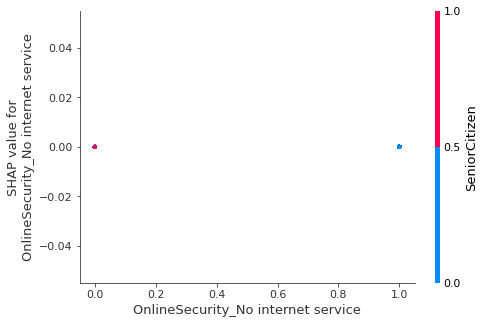

OnlineSecurity_Yes


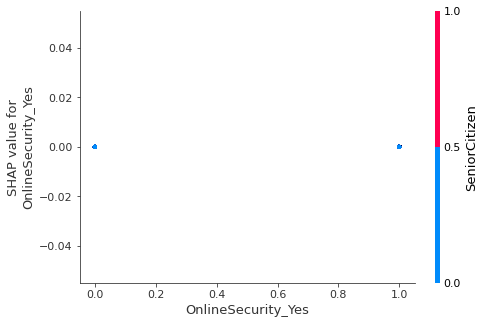

OnlineBackup_No


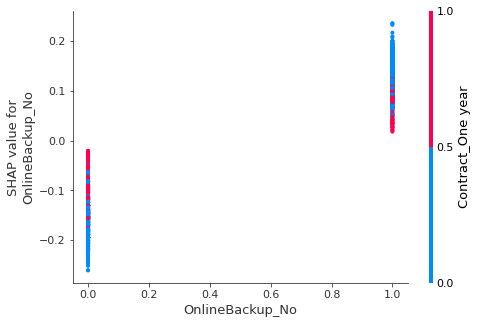

OnlineBackup_No internet service


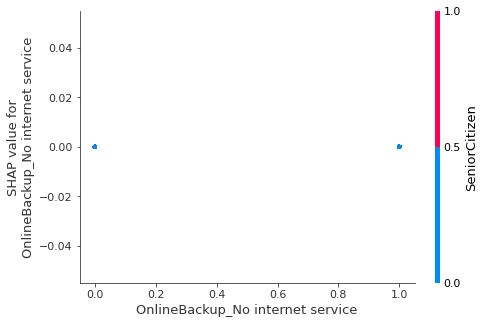

OnlineBackup_Yes


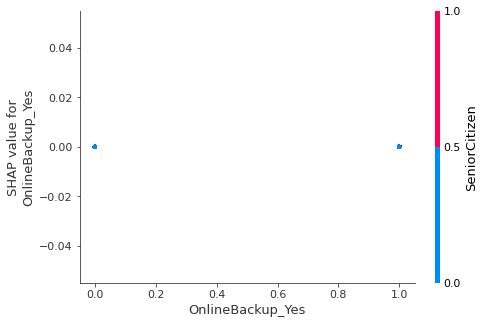

DeviceProtection_No


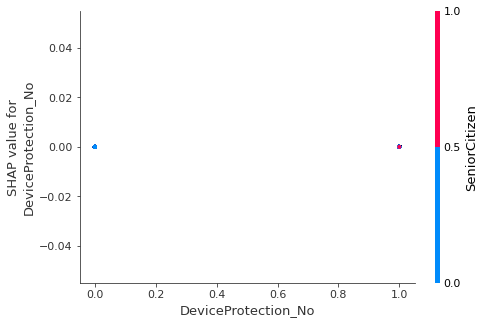

DeviceProtection_No internet service


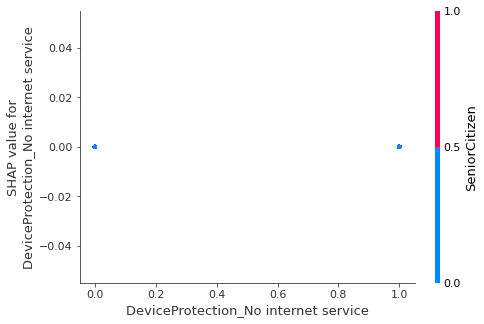

DeviceProtection_Yes


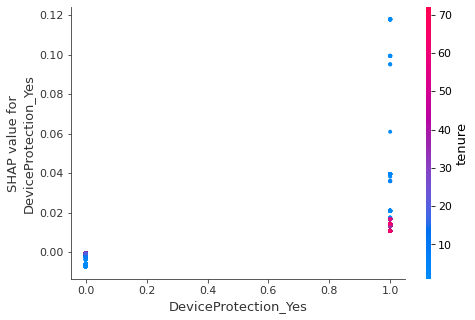

TechSupport_No


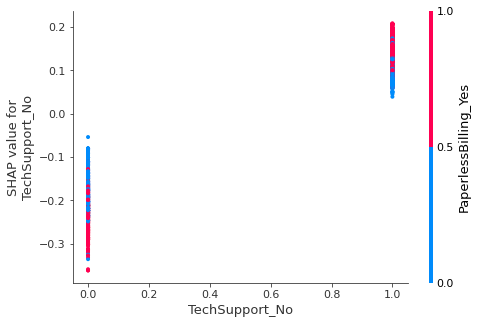

TechSupport_No internet service


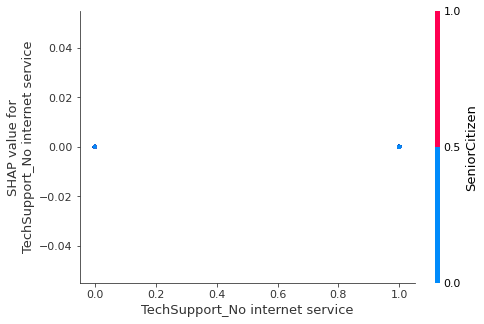

TechSupport_Yes


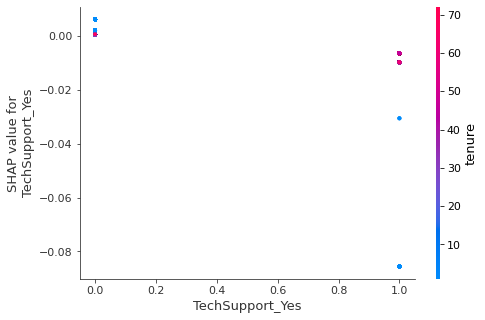

StreamingTV_No


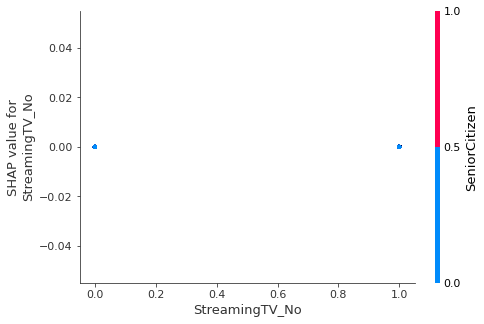

StreamingTV_No internet service


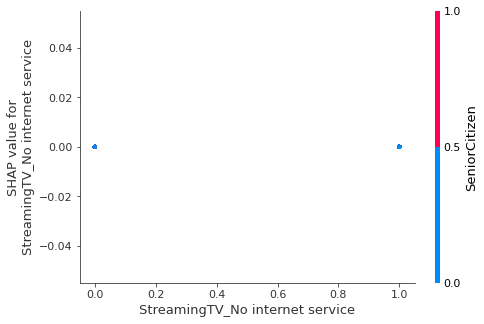

StreamingTV_Yes


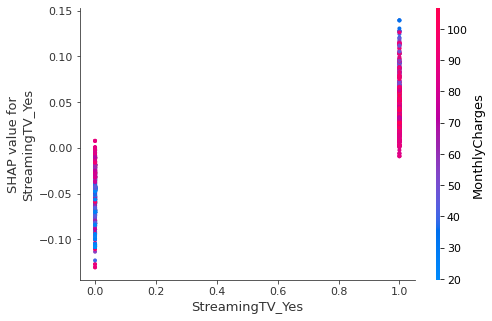

StreamingMovies_No


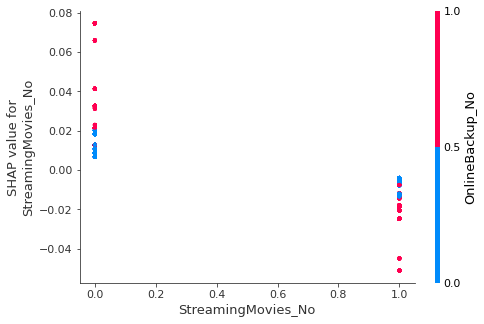

StreamingMovies_No internet service


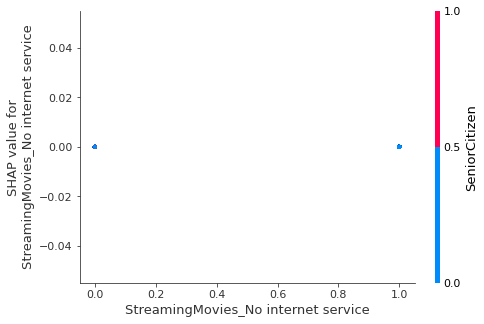

StreamingMovies_Yes


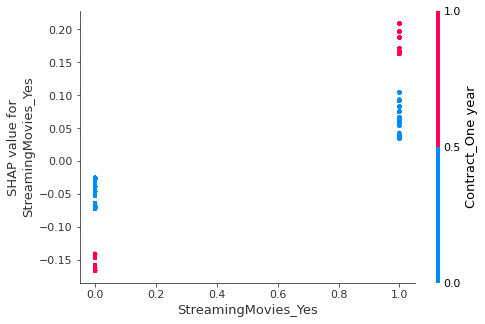

Contract_Month-to-month


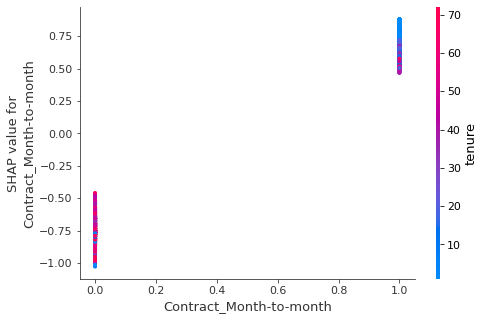

Contract_One year


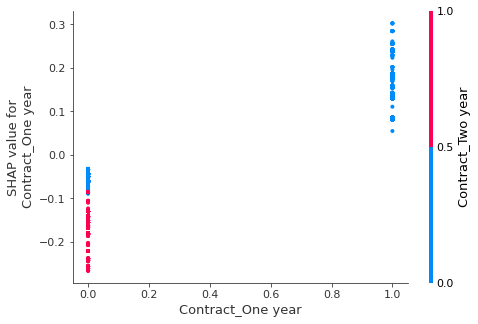

Contract_Two year


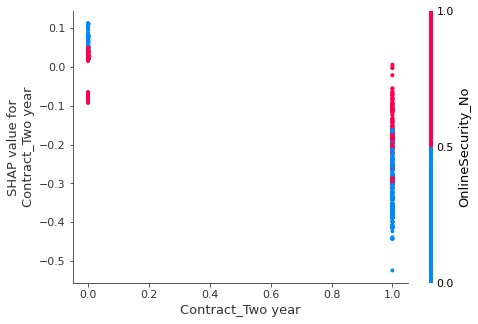

PaperlessBilling_No


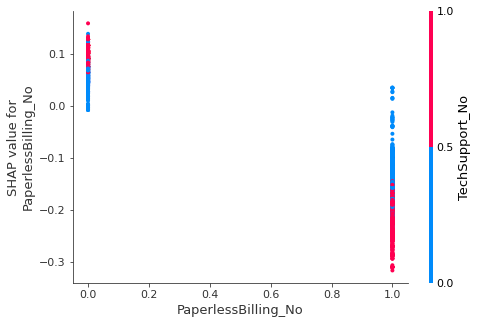

PaperlessBilling_Yes


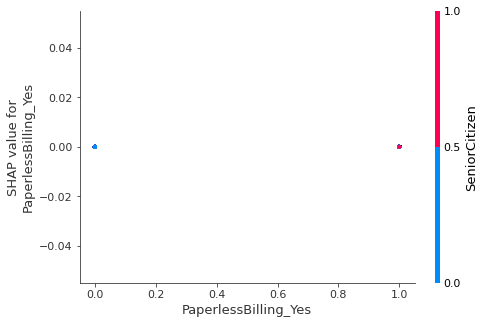

PaymentMethod_Bank transfer (automatic)


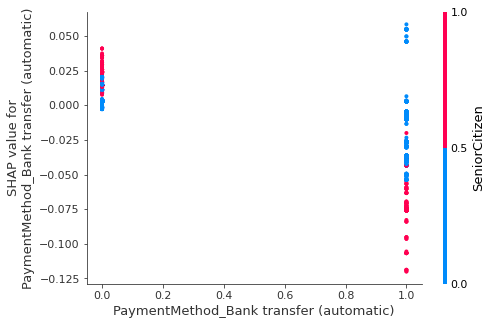

PaymentMethod_Credit card (automatic)


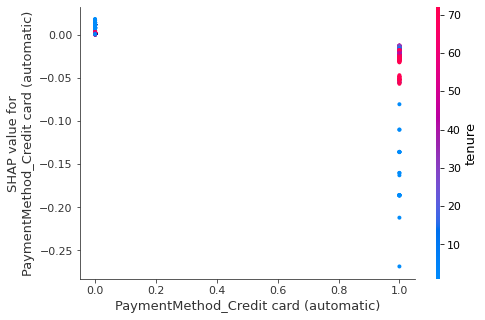

PaymentMethod_Electronic check


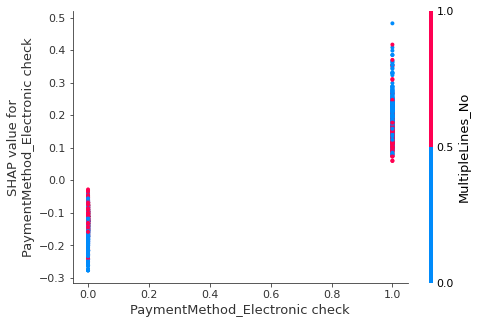

PaymentMethod_Mailed check


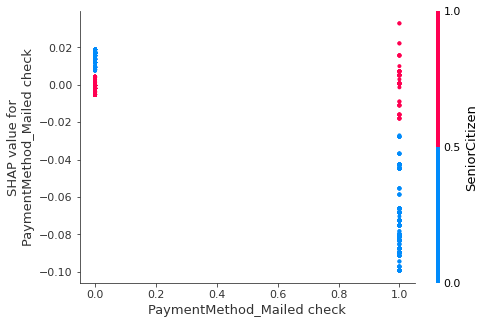

In [112]:
for name in X_train.columns:
    print(name)
    shap.dependence_plot(name, shap_values, X_train, display_features=X_train)

Drop na for random forest and logistic regression

In [7]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan).astype(float)
df=df.dropna()
X = df.drop(columns='Churn')
y= df['Churn']
print(X.shape)
print(y.shape)
X_train_a, X_test, y_train_a, y_test = model_selection.train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)

(7032, 20)
(7032,)


In [8]:
# Drop unused column
X_train=X_train.drop(["customerID"],axis=1)
X_test=X_test.drop(["customerID"],axis=1)
# Convert total charge object to numeric
X_train['TotalCharges'] = X_train['TotalCharges'].replace(' ', np.nan).astype(float)
X_test['TotalCharges'] = X_test['TotalCharges'].replace(' ', np.nan).astype(float)
# Convert to category (factor)
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [9]:
# Random forest khong dung duoc neu con Nan value
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[927 106]
 [191 183]]
Balanced Accuracy score: 0.6933455332322139
macro f1 score: 0.7069804426437456
              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1033
         Yes       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [10]:
# LogisticRegression khong dung duoc neu con Nan value
model=LogisticRegression(C=1,max_iter=100000)
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('Balanced Accuracy score:',balanced_accuracy_score(y_test,predictions))
print('macro f1 score:',f1_score(y_test,predictions,average="macro")) # good for imbalance dataset
print(classification_report(y_test,predictions))

[[917 116]
 [164 210]]
Balanced Accuracy score: 0.7246015188615269
macro f1 score: 0.7337748344370861
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1033
         Yes       0.64      0.56      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407



In [20]:
# Creating a list of the classifiers
classifiers = {
    #'KNN':KNeighborsClassifier(),     
    'LR':LogisticRegression(),
    'LDA':LinearDiscriminantAnalysis(), 
    'CART':DecisionTreeClassifier(), #Boosting is more suitable
    #'NB':GaussianNB(),
    #'SVC':SVC(), #only 0.5 not suitable for imbalanced data set before tunning
    #Ensemble:
    'RF':RandomForestClassifier(), #Bagging (very long)
    #'AB':AdaBoostClassifier(),  #Boosting
    #'GBM':GradientBoostingClassifier(), #Boosting
    #'ET':ExtraTreesClassifier(), #Bagging (very long)
    #New from Matt cookbook
    'XGB':XGBClassifier(), #New Boosting
    'LGBM':LGBMClassifier(), #New Boosting
    "Catboost": CatBoostClassifier()
    
}

In [ ]:
#Cross validate
import time
num_folds = 5
seed = 7

scoring = {'accuracy' : make_scorer(balanced_accuracy_score), 
           'precision' : make_scorer(precision_score,average='macro'),
           'recall' : make_scorer(recall_score,average='macro'), 
           'f1' : make_scorer(f1_score,average='macro')}

names = []
train_acc=[]
train_rec_macro=[]
train_prec_macro=[]
train_f1_macro=[]
test_acc=[]
test_rec_macro=[]
test_prec_macro=[]
test_f1_macro=[]
fit_time=[]
time_=[]

for name, model in classifiers.items():
  print(name)
  start=time.time()
  estimator = model
  
  kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=True)
  cv_results = cross_validate(estimator, X_train, y_train, cv=kfold, scoring=scoring,
                              return_train_score=True,
                              return_estimator=True
                              )

  # Time :
  time_cal=time.time() - start
  print('time : %0.3f' % (time_cal),'\n')
  
  #results.append(cv_results) # array of values
  names.append(name)
  train_acc.append(cv_results['train_accuracy'].mean())
  train_rec_macro.append(cv_results['train_recall'].mean())
  train_prec_macro.append(cv_results['train_precision'].mean())
  train_f1_macro.append(cv_results['train_f1'].mean())

  test_acc.append( cv_results['test_accuracy'].mean())
  test_rec_macro.append(cv_results['test_recall'].mean())
  test_prec_macro.append(cv_results['test_precision'].mean())
  test_f1_macro.append(cv_results['test_f1'].mean())

  fit_time.append(cv_results['fit_time'].mean())
  time_.append(time_cal)

  #print(cv_results.keys())
  print("%s: train_acc: %0.2f train_rec_macro: %0.2f train_prec_macro: %0.2f \
  test_acc: %0.2f test_rec_macro: %0.2f test_prec_macro: %0.2f \
  fit_time: %0.2f" % 
       (name, cv_results['train_accuracy'].mean(),cv_results['train_recall'].mean(),cv_results['train_precision'].mean(),
       cv_results['test_accuracy'].mean(),cv_results['test_recall'].mean(),cv_results['test_precision'].mean(),
       cv_results['fit_time'].mean()))
 # print(name, cv_results['train_acc'].mean(),cv_results['train_rec_micro'],cv_results['train_prec_macro'],
  #      cv_results['test_acc'],cv_results['test_rec_micro'],cv_results['test_prec_macro'],
   #      cv_results['score_time'],cv_results['fit_time']) 


In [22]:
df_results_val=pd.DataFrame(list(zip(names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,
                                     train_acc,train_rec_macro,train_prec_macro,train_f1_macro,
                                     fit_time,time_)),
                  columns=['Names','test_acc','test_rec_macro','test_prec_macro','test_f1_macro',
                           'train_acc','train_rec_macro','train_prec_macro','train_f1_macro',
                           'fit_time','time'])
df_results_val=df_results_val.sort_values(by='test_f1_macro',ascending=False)
df_results_val

,Names,test_acc,test_rec_macro,test_prec_macro,test_f1_macro,train_acc,train_rec_macro,train_prec_macro,train_f1_macro,fit_time,time
0,LR,0.719036,0.719036,0.747275,0.730306,0.725972,0.725972,0.756135,0.738044,0.138919,1.712498
4,XGB,0.716862,0.716862,0.749388,0.729445,0.754279,0.754279,0.792835,0.769577,0.468400,3.057314
1,LDA,0.718291,0.718291,0.738066,0.726423,0.723666,0.723666,0.744088,0.732357,0.040169,1.141833
6,Catboost,0.712539,0.712539,0.743321,0.724575,0.843666,0.843666,0.879059,0.858981,5.231655,26.884847
5,LGBM,0.711758,0.711758,0.738432,0.722478,0.876574,0.876574,0.897481,0.886145,0.147573,1.563041
3,RF,0.680805,0.680805,0.717879,0.693792,0.997487,0.997487,0.996829,0.997155,0.496999,3.624833
2,CART,0.663375,0.663375,0.660073,0.661399,0.995953,0.995953,0.998356,0.997146,0.030262,0.783005


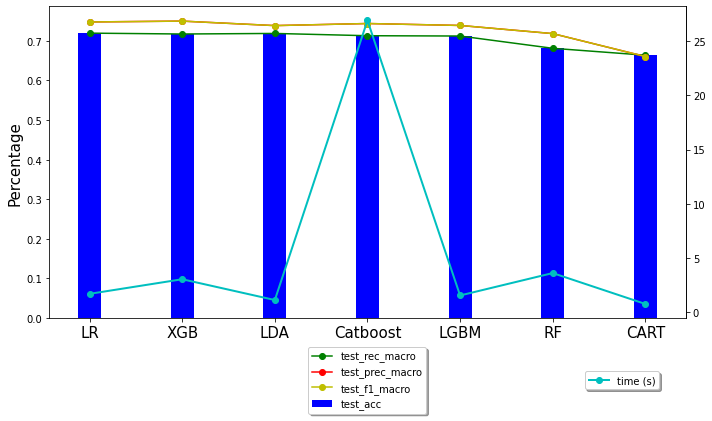

In [23]:
# Define name:
name=df_results_val['Names']
test_acc=df_results_val['test_acc']
test_rec_micro=df_results_val['test_rec_macro']
test_prec_macro=df_results_val['test_prec_macro']
test_f1_macro=df_results_val['test_f1_macro']
time = df_results_val['time']
# Plot:
x = np.arange(len(name))
fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x, test_acc, color = 'b', width = 0.25,label='test_acc')
rects2 = ax.plot(x, test_rec_micro, color = 'g',marker='o',label='test_rec_macro')
rects3 = ax.plot(x, test_prec_macro, color = 'r',marker='o',label='test_prec_macro')
rects4 = ax.plot(x, test_prec_macro, color = 'y',marker='o',label='test_f1_macro')

ax2 = ax.twinx()
ax2.plot(x,time,color ='c',marker='o',lw=2,label='time (s)')
ax2.secondary_yaxis('right')

ax.set_xticks(x)
ax.set_xticklabels(name,fontsize=15)
ax.set_ylabel('Percentage',fontsize=15)
ax2.set_ylabel('Time',fontsize=15)
#plt.gca().legend(loc ='center',bbox_to_anchor=(0.5, -0.2))
legend1=ax.legend(loc='center',bbox_to_anchor=(0.5, -0.2),shadow=True, fontsize='medium')
legend2=ax2.legend(loc='center',bbox_to_anchor=(0.9, -0.2),shadow=True, fontsize='medium')

plt.axis('off')
fig.tight_layout()
plt.show()

## Grid search

In [ ]:
abc

In [15]:
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [16]:

lgb_estimator =LGBMClassifier(boosting_type='gbdt',  objective='binary', 
                              num_boost_round=2000, learning_rate=0.01, metric='balanced_accuracy')
cv = model_selection.RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

gsearch = model_selection.GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=cv)
lgb_model = gsearch.fit(X=X_train, y=y_train)

print(lgb_model.best_params_, lgb_model.best_score_)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_boost_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


KeyboardInterrupt: ignored